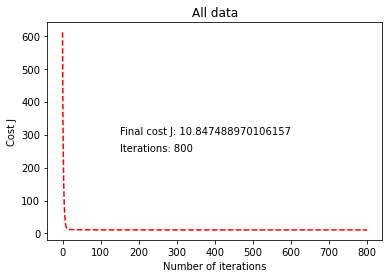

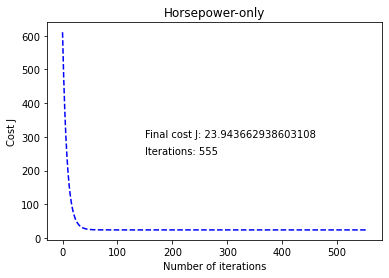

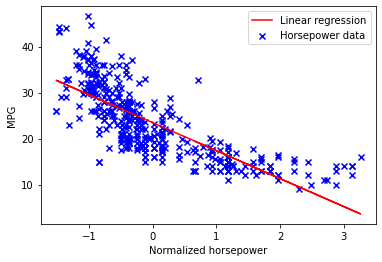

In [298]:
from load_auto import load_auto 
from matplotlib import pyplot as plt 
import numpy as np 

xtrain_all, xtrain_horsepower, ytrain = load_auto() 

# Preprocessing training data 
training_all_mean = np.mean(xtrain_all, axis = 0) 
training_hp_mean = np.mean(xtrain_horsepower, axis = 0) 

training_all_std = np.std(xtrain_all, axis = 0) 
training_hp_std = np.std(xtrain_horsepower, axis = 0) 

xtn_all = (xtrain_all - training_all_mean) / training_all_std
xtn_hp = (xtrain_horsepower - training_hp_mean) / training_hp_std 

def init_params(xt): 
    n_feat = xt.shape[1] 
    w = np.zeros((1, n_feat)) 
    b = np.zeros(1) 

    return w, b 

def gradient_descent(xtrain, ytrain, learning_rate, maxit): 

    w, b = init_params(xtrain)  
    wp = 0 
    bp = 0 
    zi = np.zeros(shape = (xtrain.shape[0], 1)) 
    J = [] 
    it = 0 
    n = ytrain.shape[0] 
    nw = 1 
    nb = 1 

    while (nw > 0 or nb > 0) and it != maxit:
        wp = w 
        bp = b 
        zi = np.sum(w * xtrain, axis = 1, keepdims = True) + b
        dJdb = (2/n) * np.sum(zi - ytrain, axis = 0, keepdims = True) 
        dJdw = (2/n) * np.sum((zi - ytrain) * xtrain, axis = 0, keepdims = True) 

        w = w - learning_rate * dJdw 
        b = b - learning_rate * dJdb 
        
        nw = np.sqrt(np.linalg.norm(w - wp))
        nb = np.sqrt(np.linalg.norm(b - bp))

        it += 1 
        J.append((1/n) * np.sum((ytrain -  zi) ** 2)) 

    return J, it, w, b , zi 

J_all , it_all, w_all, b_all, z_all = gradient_descent(xtn_all, ytrain, 0.1, maxit = 800) 
plt.figure(1) 
plt.plot(np.arange(0,it_all), J_all, 'r--') 
plt.annotate("Final cost J: "+str(J_all[len(J_all) - 1]), xy = (150,300))
plt.annotate("Iterations: "+str(it_all), xy = (150,250))
plt.xlabel('Number of iterations')
plt.ylabel('Cost J') 
plt.title('All data')

J_hp , it_hp, w_hp, b_hp, z_hp = gradient_descent(xtn_hp, ytrain, 0.03, maxit = 800) 
plt.figure(2) 
plt.plot(np.arange(0,it_hp), J_hp, 'b--') 
plt.annotate("Final cost J: "+str(J_hp[len(J_hp) - 1]), xy = (150,300))
plt.annotate("Iterations: "+str(it_hp), xy = (150,250))
plt.xlabel('Number of iterations')
plt.ylabel('Cost J') 
plt.title('Horsepower-only')

plt.figure(3) 
plt.scatter(xtn_hp, ytrain, marker = "x", c = "blue") 
plt.plot(xtn_hp, z_hp, 'r') 
plt.legend(["Linear regression", "Horsepower data"])
plt.xlabel('Normalized horsepower')
plt.ylabel('MPG')
plt.show()